In [ ]:
!nvidia-smi

Sat Jul 10 11:01:01 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from tqdm import tqdm
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split 
from keras.models import Sequential
from keras.layers import Dense , Conv2D, Flatten ,MaxPooling2D
import tensorflow as tf
import matplotlib.pyplot as plt 
import os 
import pandas as pd 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
input_path = '/content/drive/MyDrive/final work isa/Crop_pic'
test_path = '/content/drive/MyDrive/final work isa/test'
test_csv = pd.read_csv('/content/drive/MyDrive/final work isa/csv/train/test_binary.csv')
csv_path = '/content/drive/MyDrive/final work isa/csv/train/equal_binary.csv'

#load csv file
csv = pd.read_csv(csv_path)
csv

,image_id,class_name
0,869f39afbdd8783b531530942eda8bad.jpg,Normal
1,f55460fccf2d3c591f57f9c0de2c37c2.jpg,Normal
2,cdbacab6bf30170ef0ba9fd1d195d270.jpg,Normal
3,fb8e11c6b2886b2d41b379e0598669b9.jpg,Abnormal
4,c6e0ab2470d98a6a8c701e774df929cc.jpg,Normal
...,...,...
21203,7c0ddf911bdb68fca14d7172486827cb.jpg,Normal
21204,209e3a5c73c1195d805dd25d086b3c6d.jpg,Normal
21205,1bea772246421c37929f8cbc43dba729.jpg,Normal
21206,ae86eabab95525b41b8e79883ff1cef9.jpg,Normal


In [ ]:
x_train , x_val = train_test_split(csv,test_size = 0.2)
x_val

,image_id,class_name
16277,1280dc55c1ff852024be232c2942e3fd_5.jpg,Abnormal
10881,3c022a8f6192af3d7ca567e509d44801.jpg,Abnormal
589,a946684583c7bf346b18e1d69d17e9cf.jpg,Abnormal
13188,66d28ab317b915eb7a400ad4a005ebc0.jpg,Abnormal
12389,ddd12b32eca38d67c4a3f99f5878f560.jpg,Normal
...,...,...
17979,f4962890f0c6db4611fec9d3d0e97ea2.jpg,Normal
20794,9f4cf94c0c29ccded84379b0792453f3.jpg,Normal
3544,4f27cfb82f3a2cfab10232f1c9a34d06.jpg,Normal
9983,4e04cff2cf0a68cc8fc0163214ac7819.jpg,Normal


In [ ]:
def evaluate_nodes(nodes,train_gen,test_gen):
  model = Sequential()
  #input
  model.add(Conv2D(nodes,(3,3),input_shape = (256,256,3),activation = 'relu',kernel_initializer = 'he_uniform'))
  model.add(MaxPooling2D(pool_size = (2,2)))
  model.add(Flatten())
  model.add(Dense(nodes,activation = 'relu', kernel_initializer = 'he_uniform'))
  #output
  model.add(Dense(1,activation='sigmoid'))
  #compile model
  model.compile(loss = 'binary_crossentropy' ,optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum = 0.9),metrics = ['accuracy'])
  #fit model on train
  history = model.fit(train_gen,epochs = 10,validation_data = test_gen,batch_size = 32,verbose = 1)
  #evaluate model on test 
  _, test_acc = model.evaluate(test_gen , verbose = 1)
  return history , test_acc

In [ ]:
#Data Augmentation for train images
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.1,
                                   zoom_range=0.2,
                                   fill_mode='nearest',
                                   horizontal_flip=True,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1)

#data augmentation for test images
validation_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_gen = train_datagen.flow_from_dataframe(        x_train,
                                                      input_path,
                                                      x_col='image_id',
                                                      y_col='class_name',
                                                      target_size = (256,256),
                                                      class_mode='binary',
                                                      batch_size = 32
                                              )
  
test_gen = validation_datagen.flow_from_dataframe(    x_val,
                                                      input_path,
                                                      x_col='image_id',
                                                      y_col='class_name',
                                                      target_size = (256,256),
                                                      class_mode='binary',
                                                      batch_size = 32
                                                  )

Found 16966 validated image filenames belonging to 2 classes.
Found 4242 validated image filenames belonging to 2 classes.


  0%|          | 0/3 [00:00<?, ?it/s]


Train number 1
Epoch 1/10
531/531 [==============================] - 5255s 10s/step - loss: 2.5853 - accuracy: 0.6092 - val_loss: 0.5708 - val_accuracy: 0.7159
Epoch 2/10
531/531 [==============================] - 282s 531ms/step - loss: 0.5588 - accuracy: 0.7078 - val_loss: 0.3764 - val_accuracy: 0.8548
Epoch 3/10
531/531 [==============================] - 276s 519ms/step - loss: 0.4514 - accuracy: 0.7886 - val_loss: 0.2843 - val_accuracy: 0.8800
Epoch 4/10
531/531 [==============================] - 273s 515ms/step - loss: 0.3974 - accuracy: 0.8240 - val_loss: 0.2531 - val_accuracy: 0.9026
Epoch 5/10
531/531 [==============================] - 273s 514ms/step - loss: 0.3726 - accuracy: 0.8341 - val_loss: 0.2461 - val_accuracy: 0.8996
Epoch 6/10
531/531 [==============================] - 268s 505ms/step - loss: 0.3670 - accuracy: 0.8371 - val_loss: 0.3299 - val_accuracy: 0.8510
Epoch 7/10
531/531 [==============================] - 267s 503ms/step - loss: 0.3597 - accuracy: 0.8444 - val

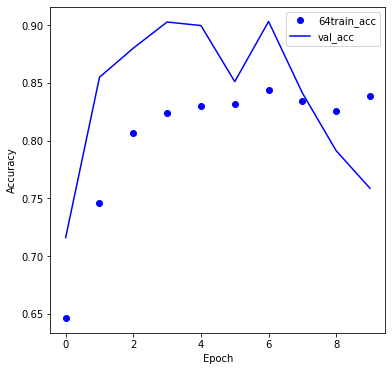

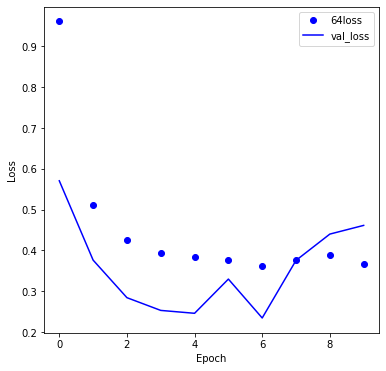

 33%|███▎      | 1/3 [2:08:42<4:17:24, 7722.12s/it]


Train number 2
Epoch 1/10
531/531 [==============================] - 269s 505ms/step - loss: 4.9959 - accuracy: 0.6098 - val_loss: 0.5285 - val_accuracy: 0.7515
Epoch 2/10
531/531 [==============================] - 268s 505ms/step - loss: 0.6039 - accuracy: 0.6722 - val_loss: 0.5988 - val_accuracy: 0.6601
Epoch 3/10
531/531 [==============================] - 270s 508ms/step - loss: 0.5916 - accuracy: 0.6700 - val_loss: 0.5785 - val_accuracy: 0.7148
Epoch 4/10
531/531 [==============================] - 269s 507ms/step - loss: 0.5829 - accuracy: 0.6783 - val_loss: 0.5566 - val_accuracy: 0.7072
Epoch 5/10
531/531 [==============================] - 270s 508ms/step - loss: 0.5730 - accuracy: 0.6906 - val_loss: 0.4037 - val_accuracy: 0.8140
Epoch 6/10
531/531 [==============================] - 270s 508ms/step - loss: 0.4803 - accuracy: 0.7693 - val_loss: 0.3369 - val_accuracy: 0.8576
Epoch 7/10
531/531 [==============================] - 266s 502ms/step - loss: 0.4104 - accuracy: 0.8137 - va

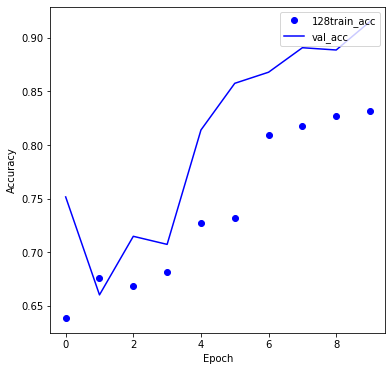

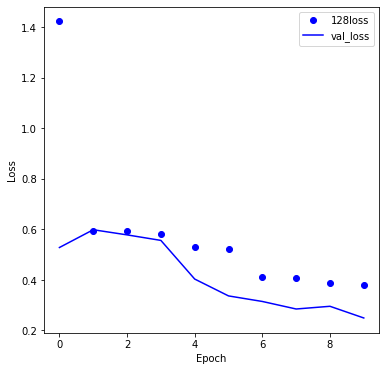

 67%|██████▋   | 2/3 [2:54:29<1:43:49, 6229.79s/it]


Train number 3


In [ ]:
num_nodes = [64,128,256]
counter = 1
for nodes in tqdm(num_nodes): 
  
  print(f'\nTrain number {counter}')

  history , test_acc  = evaluate_nodes(nodes, train_gen, test_gen)
  
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  print('nodes = %d : %.3f' % (nodes, test_acc))

  #plot accuracy learning curve
  plt.figure(figsize= (6,6))
  plt.plot(epochs, acc,'bo', label = str(nodes) + 'train_acc')
  plt.plot(epochs, val_acc, 'b', label = 'val_acc')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(loc = 'upper right')
  plt.show()

  #plot loss learning curve
  plt.figure(figsize= (6,6))
  plt.plot(epochs, loss,'bo', label = str(nodes) + 'loss')
  plt.plot(epochs, val_loss, 'b' ,label = 'val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(loc = 'upper right')
  plt.show()

  counter += 1

In [ ]:
def evaluate_layers(layers , train_gen, test_gen):
  #define model
  nodes =  128
  model = Sequential()
  model.add(Conv2D(nodes,(3,3),input_shape = (256,256,3),activation = 'relu', kernel_initializer = 'he_uniform'))
  model.add(MaxPooling2D(pool_size = (2,2)))
  model.add(Flatten())
  model.add(Dense(nodes,activation = 'relu',kernel_initializer = 'he_uniform'))
  for _ in range(1,layers):
    model.add(Dense(nodes,activation = 'relu',kernel_initializer = 'he_uniform'))
  model.add(Dense(1,activation = 'sigmoid'))
  #compile 
  model.compile(loss = 'binary_crossentropy', optimizer = tf.keras.optimizers.SGD(learning_rate = 0.01, momentum = 0.9) , metrics = ['accuracy'])
  #fit model
  history = model.fit(train_gen,validation_data = test_gen,epochs = 10,batch_size = 32, verbose = 1)
  #evaluate model
  _ , test_acc = model.evaluate(test_gen,verbose = 1)
  return history ,test_acc


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch 1/10
531/531 [==============================] - 275s 515ms/step - loss: 7.2674 - accuracy: 0.5903 - val_loss: 0.5446 - val_accuracy: 0.7393
Epoch 2/10
531/531 [==============================] - 274s 516ms/step - loss: 0.6291 - accuracy: 0.6335 - val_loss: 0.5358 - val_accuracy: 0.7320
Epoch 3/10
531/531 [==============================] - 272s 512ms/step - loss: 0.5956 - accuracy: 0.6600 - val_loss: 0.5235 - val_accuracy: 0.7322
Epoch 4/10
531/531 [==============================] - 274s 516ms/step - loss: 0.5868 - accuracy: 0.6688 - val_loss: 0.5136 - val_accuracy: 0.7567
Epoch 5/10
531/531 [==============================] - 283s 533ms/step - loss: 0.5502 - accuracy: 0.7033 - val_loss: 0.5176 - val_accuracy: 0.7546
Epoch 6/10
531/531 [==============================] - 276s 520ms/step - loss: 0.5736 - accuracy: 0.6810 - val_loss: 0.2944 - val_accuracy: 0.8991
Epoch 7/10
531/531 [==============================] - 275s 519ms/step - loss: 0.5066 - accuracy: 0.7363 - val_loss: 0.2749 -

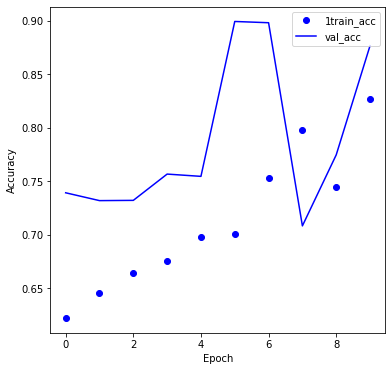

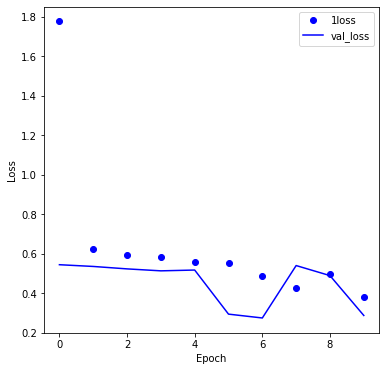


 33%|███▎      | 1/3 [46:26<1:32:52, 2786.16s/it]

Epoch 1/10
531/531 [==============================] - 280s 525ms/step - loss: 5.8412 - accuracy: 0.5746 - val_loss: 0.7749 - val_accuracy: 0.4371
Epoch 2/10
531/531 [==============================] - 272s 513ms/step - loss: 0.6881 - accuracy: 0.5743 - val_loss: 0.5699 - val_accuracy: 0.6924
Epoch 3/10
531/531 [==============================] - 270s 509ms/step - loss: 0.6687 - accuracy: 0.6261 - val_loss: 0.5312 - val_accuracy: 0.7197
Epoch 4/10
531/531 [==============================] - 271s 511ms/step - loss: 0.5855 - accuracy: 0.6797 - val_loss: 0.3886 - val_accuracy: 0.8326
Epoch 5/10
531/531 [==============================] - 272s 512ms/step - loss: 0.5955 - accuracy: 0.6780 - val_loss: 0.5224 - val_accuracy: 0.7461
Epoch 6/10
531/531 [==============================] - 275s 518ms/step - loss: 0.5725 - accuracy: 0.6799 - val_loss: 0.5278 - val_accuracy: 0.7350
Epoch 7/10
531/531 [==============================] - 278s 524ms/step - loss: 0.5718 - accuracy: 0.6831 - val_loss: 0.4471 -

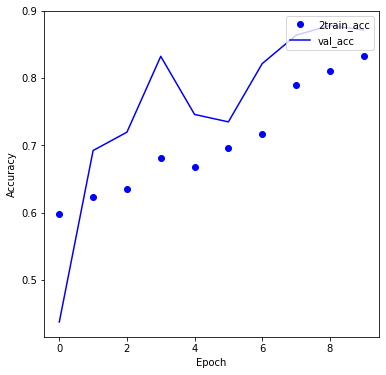

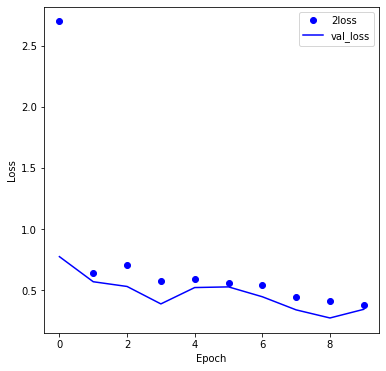


 67%|██████▋   | 2/3 [1:32:38<46:22, 2782.12s/it]

Epoch 1/10
531/531 [==============================] - 276s 519ms/step - loss: nan - accuracy: 0.4936 - val_loss: nan - val_accuracy: 0.5014
Epoch 2/10
531/531 [==============================] - 281s 529ms/step - loss: nan - accuracy: 0.4920 - val_loss: nan - val_accuracy: 0.5014
Epoch 3/10
531/531 [==============================] - 278s 523ms/step - loss: nan - accuracy: 0.4984 - val_loss: nan - val_accuracy: 0.5014
Epoch 4/10
531/531 [==============================] - 280s 527ms/step - loss: nan - accuracy: 0.5035 - val_loss: nan - val_accuracy: 0.5014
Epoch 5/10
531/531 [==============================] - 283s 533ms/step - loss: nan - accuracy: 0.5000 - val_loss: nan - val_accuracy: 0.5014
Epoch 6/10
531/531 [==============================] - 282s 530ms/step - loss: nan - accuracy: 0.5061 - val_loss: nan - val_accuracy: 0.5014
Epoch 7/10
531/531 [==============================] - 280s 527ms/step - loss: nan - accuracy: 0.5041 - val_loss: nan - val_accuracy: 0.5014
Epoch 8/10
531/531 [

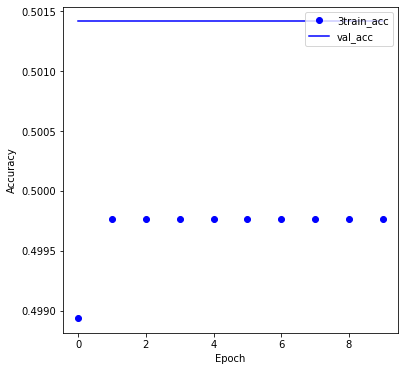

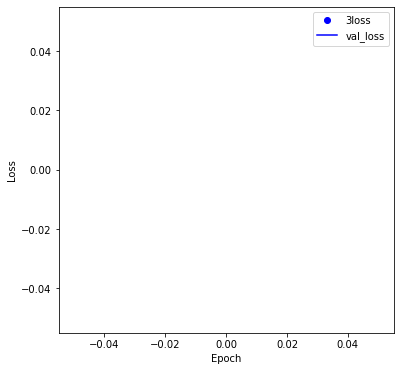


100%|██████████| 3/3 [2:19:52<00:00, 2797.51s/it]


In [ ]:
num_layers = [1,2,3]
for n_layers in tqdm(num_layers):
  #evaluate model
  history , result = evaluate_layers(n_layers,train_gen,test_gen)
  print('layers = %d : %3.f' %(n_layers , result))
  #plot learning curve
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))



  #plot accuracy learning curve
  plt.figure(figsize= (6,6))
  plt.plot(epochs, acc,'bo', label = str(n_layers) + 'train_acc')
  plt.plot(epochs, val_acc, 'b', label = 'val_acc')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(loc = 'upper right')
  plt.show()

  #plot loss learning curve
  plt.figure(figsize= (6,6))
  plt.plot(epochs, loss,'bo', label = str(n_layers) + 'loss')
  plt.plot(epochs, val_loss, 'b' ,label = 'val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(loc = 'upper right')
  plt.show()


In [ ]:
def evaluate_layers(layers_conv2d , train_gen, test_gen):
  #define model
  nodes = 128
  
  model = Sequential()
  
  model.add(Conv2D(nodes,(3,3),input_shape = (256,256,3),activation = 'relu', kernel_initializer = 'he_uniform'))
  model.add(MaxPooling2D(pool_size = (2,2)))

  for _ in range(1,layers_conv2d):
    model.add(Conv2D(nodes,(3,3),activation = 'relu', kernel_initializer = 'he_uniform'))
    model.add(MaxPooling2D(pool_size = (2,2)))
  
  model.add(Flatten())
  model.add(Dense(nodes,activation = 'relu',kernel_initializer = 'he_uniform'))
  model.add(Dense(nodes,activation = 'relu',kernel_initializer = 'he_uniform'))
  model.add(Dense(nodes,activation = 'relu',kernel_initializer = 'he_uniform'))  
  model.add(Dense(1,activation = 'sigmoid'))
  #compile 
  model.compile(loss = 'binary_crossentropy', optimizer = tf.keras.optimizers.SGD(learning_rate = 0.01, momentum = 0.9) , metrics = ['accuracy'])
  #fit model
  history = model.fit(train_gen,validation_data = test_gen,epochs = 10,batch_size = 32, verbose = 1)
  #evaluate model
  _ , test_acc = model.evaluate(test_gen,verbose = 1)
  return history ,test_acc





  0%|          | 0/3 [00:00<?, ?it/s]

Epoch 1/10
531/531 [==============================] - 274s 514ms/step - loss: 0.8429 - accuracy: 0.5770 - val_loss: 0.5896 - val_accuracy: 0.6740
Epoch 2/10
531/531 [==============================] - 270s 508ms/step - loss: 1.4300 - accuracy: 0.5930 - val_loss: 0.6939 - val_accuracy: 0.4986
Epoch 3/10
531/531 [==============================] - 269s 506ms/step - loss: 0.7099 - accuracy: 0.5028 - val_loss: 0.6964 - val_accuracy: 0.5014
Epoch 4/10
531/531 [==============================] - 269s 507ms/step - loss: 0.6977 - accuracy: 0.4928 - val_loss: 0.6943 - val_accuracy: 0.4986
Epoch 5/10
531/531 [==============================] - 272s 512ms/step - loss: 0.6959 - accuracy: 0.4934 - val_loss: 0.6990 - val_accuracy: 0.4986
Epoch 6/10
531/531 [==============================] - 268s 505ms/step - loss: 0.6965 - accuracy: 0.4956 - val_loss: 0.6937 - val_accuracy: 0.4986
Epoch 7/10
531/531 [==============================] - 268s 504ms/step - loss: 0.6942 - accuracy: 0.5050 - val_loss: 0.6959 -

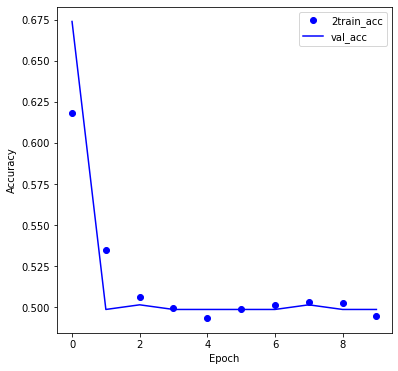

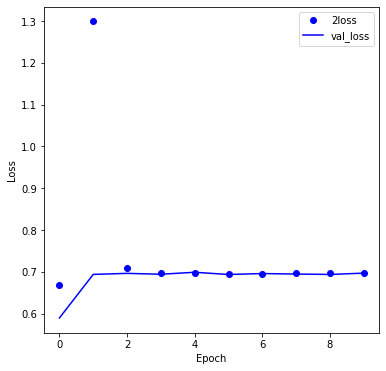





 33%|███▎      | 1/3 [45:20<1:30:40, 2720.13s/it]

Epoch 1/10
531/531 [==============================] - 272s 509ms/step - loss: 2.0616 - accuracy: 0.5037 - val_loss: 0.6805 - val_accuracy: 0.5017
Epoch 2/10
531/531 [==============================] - 267s 504ms/step - loss: 0.6588 - accuracy: 0.5541 - val_loss: 0.6002 - val_accuracy: 0.6598
Epoch 3/10
531/531 [==============================] - 267s 503ms/step - loss: 0.6078 - accuracy: 0.6353 - val_loss: 0.3119 - val_accuracy: 0.8508
Epoch 4/10
531/531 [==============================] - 268s 504ms/step - loss: 0.4303 - accuracy: 0.8011 - val_loss: 0.5782 - val_accuracy: 0.7020
Epoch 5/10
531/531 [==============================] - 268s 505ms/step - loss: 0.3769 - accuracy: 0.8265 - val_loss: 0.3483 - val_accuracy: 0.8383
Epoch 6/10
531/531 [==============================] - 267s 503ms/step - loss: 0.3425 - accuracy: 0.8503 - val_loss: 0.3862 - val_accuracy: 0.8107
Epoch 7/10
531/531 [==============================] - 269s 506ms/step - loss: 0.3166 - accuracy: 0.8656 - val_loss: 0.2166 -

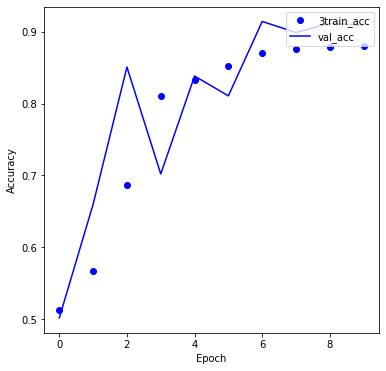

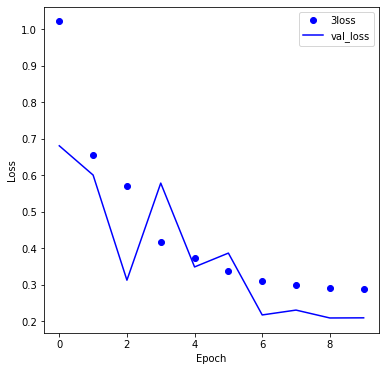





 67%|██████▋   | 2/3 [1:30:19<45:13, 2713.80s/it]

Epoch 1/10
531/531 [==============================] - 272s 511ms/step - loss: 0.8654 - accuracy: 0.5319 - val_loss: 0.6776 - val_accuracy: 0.5743
Epoch 2/10
531/531 [==============================] - 269s 507ms/step - loss: 0.6433 - accuracy: 0.6225 - val_loss: 0.4088 - val_accuracy: 0.8550
Epoch 3/10
531/531 [==============================] - 268s 505ms/step - loss: 0.4271 - accuracy: 0.8011 - val_loss: 0.2853 - val_accuracy: 0.8901
Epoch 4/10
531/531 [==============================] - 272s 512ms/step - loss: 0.3554 - accuracy: 0.8441 - val_loss: 0.2655 - val_accuracy: 0.8831
Epoch 5/10
531/531 [==============================] - 269s 506ms/step - loss: 0.3420 - accuracy: 0.8515 - val_loss: 0.2438 - val_accuracy: 0.9038
Epoch 6/10
531/531 [==============================] - 267s 503ms/step - loss: 0.3008 - accuracy: 0.8720 - val_loss: 0.3303 - val_accuracy: 0.8496
Epoch 7/10
531/531 [==============================] - 267s 502ms/step - loss: 0.2816 - accuracy: 0.8792 - val_loss: 0.2153 -

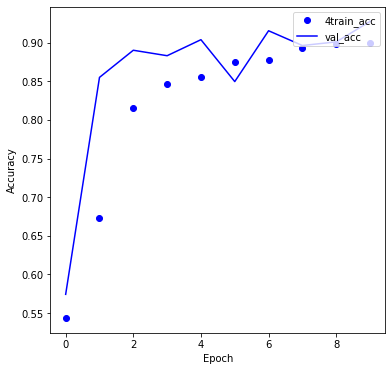

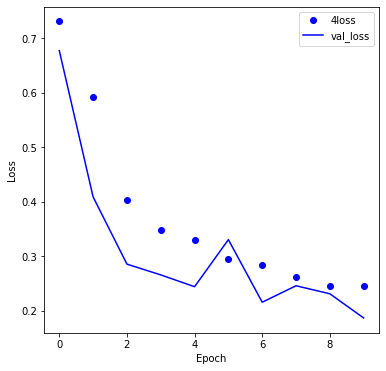





100%|██████████| 3/3 [2:15:23<00:00, 2707.82s/it]


In [ ]:
num_layers = [2,3,4]
for n_layers in tqdm(num_layers):
  #evaluate model
  history , result = evaluate_layers(n_layers,train_gen,test_gen)
  print('layers = %d : %3.f' %(n_layers , result))
  #plot learning curve
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))



  #plot accuracy learning curve
  plt.figure(figsize= (6,6))
  plt.plot(epochs, acc,'bo', label = str(n_layers) + 'train_acc')
  plt.plot(epochs, val_acc, 'b', label = 'val_acc')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(loc = 'upper right')
  plt.show()

  #plot loss learning curve
  plt.figure(figsize= (6,6))
  plt.plot(epochs, loss,'bo', label = str(n_layers) + 'loss')
  plt.plot(epochs, val_loss, 'b' ,label = 'val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(loc = 'upper right')
  plt.show()


In [ ]:
def evaluate_batch(bat_size):
  train_gen = train_datagen.flow_from_dataframe(        x_train,
                                                      input_path,
                                                      x_col='image_id',
                                                      y_col='class_name',
                                                      target_size = (256,256),
                                                      class_mode='binary',
                                                      batch_size = bat_size
                                              )
  
  test_gen = validation_datagen.flow_from_dataframe(    x_val,
                                                      input_path,
                                                      x_col='image_id',
                                                      y_col='class_name',
                                                      target_size = (256,256),
                                                      class_mode='binary',
                                                      batch_size = bat_size
                                                  )
  #define model
  nodes = 128
  model = Sequential()
  model.add(Conv2D(nodes,(3,3),input_shape = (256,256,3),activation = 'relu', kernel_initializer = 'he_uniform'))
  model.add(MaxPooling2D(pool_size = (2,2)))
  model.add(Conv2D(nodes,(3,3),activation = 'relu', kernel_initializer = 'he_uniform'))
  model.add(MaxPooling2D(pool_size = (2,2)))
  model.add(Conv2D(nodes,(3,3),activation = 'relu', kernel_initializer = 'he_uniform'))
  model.add(MaxPooling2D(pool_size = (2,2)))
  model.add(Conv2D(nodes,(3,3),activation = 'relu', kernel_initializer = 'he_uniform'))
  model.add(MaxPooling2D(pool_size = (2,2)))
  model.add(Conv2D(nodes,(3,3),activation = 'relu', kernel_initializer = 'he_uniform'))
  model.add(MaxPooling2D(pool_size = (2,2)))
  model.add(Flatten())
  # write number of hidden layers
  model.add(Dense(nodes,activation='relu',kernel_initializer='he_uniform')) 
  model.add(Dense(nodes,activation='relu',kernel_initializer='he_uniform')) 
  model.add(Dense(nodes,activation='relu',kernel_initializer='he_uniform'))
  #output layer
  model.add(Dense(1,activation = 'sigmoid'))
  #compile model
  model.compile(loss = 'binary_crossentropy', optimizer = tf.keras.optimizers.SGD(learning_rate = 0.01, momentum = 0.9) , metrics = ['accuracy'])
  #fit model
  history = model.fit(train_gen,validation_data = test_gen,epochs = 10,batch_size = bat_size, verbose = 1)
  #evaluate model
  _ , test_acc = model.evaluate(test_gen,verbose = 1)
  model.summary()
  return history ,test_acc

  0%|          | 0/4 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 1 invalid image filename(s) in x_col="image_id". These filename(s) will be ignored.
  .format(n_invalid, x_col)


Found 16965 validated image filenames belonging to 2 classes.
Found 4242 validated image filenames belonging to 2 classes.
Epoch 1/10
531/531 [==============================] - 6520s 12s/step - loss: 0.6727 - accuracy: 0.6093 - val_loss: 0.4202 - val_accuracy: 0.8487
Epoch 2/10
531/531 [==============================] - 280s 527ms/step - loss: 0.4687 - accuracy: 0.7825 - val_loss: 0.3832 - val_accuracy: 0.8149
Epoch 3/10
531/531 [==============================] - 274s 516ms/step - loss: 0.4144 - accuracy: 0.8141 - val_loss: 0.3076 - val_accuracy: 0.8609
Epoch 4/10
531/531 [==============================] - 273s 513ms/step - loss: 0.3585 - accuracy: 0.8432 - val_loss: 0.3078 - val_accuracy: 0.8616
Epoch 5/10
531/531 [==============================] - 272s 512ms/step - loss: 0.3337 - accuracy: 0.8538 - val_loss: 0.3059 - val_accuracy: 0.8720
Epoch 6/10
531/531 [==============================] - 270s 509ms/step - loss: 0.3191 - accuracy: 0.8623 - val_loss: 0.3691 - val_accuracy: 0.8298
Ep

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


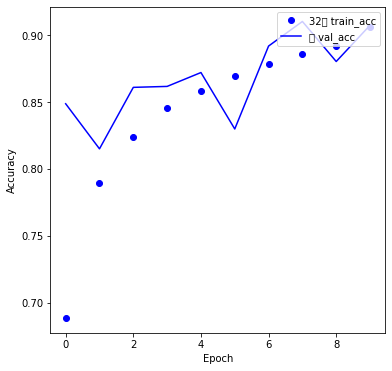

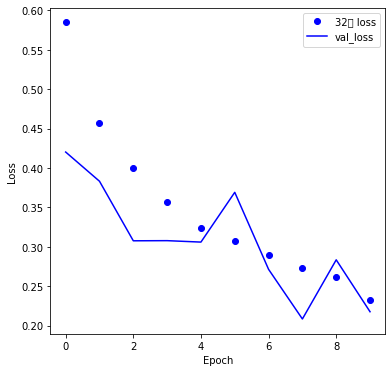

 25%|██▌       | 1/4 [2:32:47<7:38:22, 9167.46s/it]

Found 16966 validated image filenames belonging to 2 classes.
Found 4242 validated image filenames belonging to 2 classes.
Epoch 1/10
266/266 [==============================] - 267s 992ms/step - loss: 0.6736 - accuracy: 0.5999 - val_loss: 0.3413 - val_accuracy: 0.8678
Epoch 2/10
266/266 [==============================] - 264s 991ms/step - loss: 0.4885 - accuracy: 0.7715 - val_loss: 0.2913 - val_accuracy: 0.8831
Epoch 3/10
266/266 [==============================] - 267s 1s/step - loss: 0.4018 - accuracy: 0.8152 - val_loss: 0.2789 - val_accuracy: 0.8814
Epoch 4/10
266/266 [==============================] - 263s 989ms/step - loss: 0.3410 - accuracy: 0.8509 - val_loss: 0.3213 - val_accuracy: 0.8701
Epoch 5/10
266/266 [==============================] - 264s 994ms/step - loss: 0.3275 - accuracy: 0.8597 - val_loss: 0.2936 - val_accuracy: 0.8736
Epoch 6/10
266/266 [==============================] - 264s 992ms/step - loss: 0.3000 - accuracy: 0.8717 - val_loss: 0.2683 - val_accuracy: 0.8934
Epoc

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


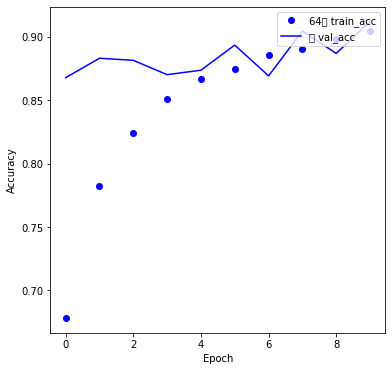

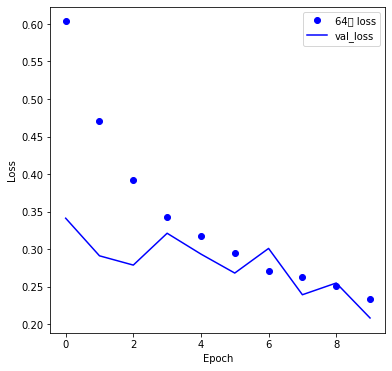

 50%|█████     | 2/4 [3:16:54<4:00:22, 7211.41s/it]

Found 16966 validated image filenames belonging to 2 classes.
Found 4242 validated image filenames belonging to 2 classes.
Epoch 1/10
133/133 [==============================] - 263s 2s/step - loss: 0.7381 - accuracy: 0.5684 - val_loss: 0.5151 - val_accuracy: 0.8347
Epoch 2/10
133/133 [==============================] - 259s 2s/step - loss: 0.5712 - accuracy: 0.7206 - val_loss: 0.3565 - val_accuracy: 0.8449
Epoch 3/10
133/133 [==============================] - 259s 2s/step - loss: 0.4418 - accuracy: 0.8006 - val_loss: 0.3028 - val_accuracy: 0.8918
Epoch 4/10
133/133 [==============================] - 258s 2s/step - loss: 0.4068 - accuracy: 0.8169 - val_loss: 0.3386 - val_accuracy: 0.8487
Epoch 5/10
133/133 [==============================] - 258s 2s/step - loss: 0.3746 - accuracy: 0.8366 - val_loss: 0.3334 - val_accuracy: 0.8614
Epoch 6/10
133/133 [==============================] - 257s 2s/step - loss: 0.3442 - accuracy: 0.8498 - val_loss: 0.2900 - val_accuracy: 0.8746
Epoch 7/10
133/133 

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


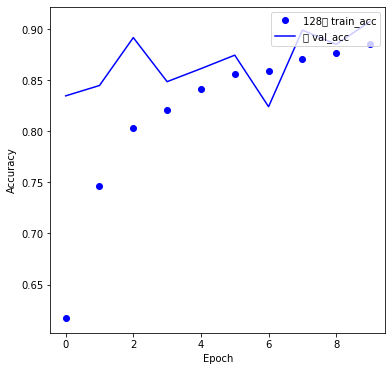

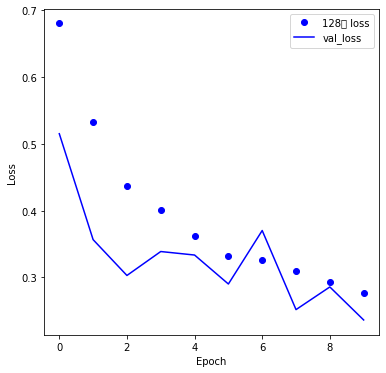

 75%|███████▌  | 3/4 [4:00:20<1:37:09, 5829.58s/it]

Found 16966 validated image filenames belonging to 2 classes.
Found 4242 validated image filenames belonging to 2 classes.
Epoch 1/10


ResourceExhaustedError: ignored

In [ ]:
size_batches = [32,64,128,256]
for size in tqdm(size_batches):
  #evaluate model
  history , result = evaluate_batch(size)

  #print resut 
  print('batches = %d : test_acc = %3.f' % (size , result))

  #variables for  learning curve
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(len(acc))

  #plot accuracy learning curve
  plt.figure(figsize= (6,6))
  plt.plot(epochs, acc,'bo', label = str(size) + '\t train_acc')
  plt.plot(epochs, val_acc, 'b', label = '\t val_acc')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(loc = 'upper right')
  plt.show()

  #plot loss learning curve
  plt.figure(figsize= (6,6))
  plt.plot(epochs, loss,'bo', label = str(size) + '\t loss')
  plt.plot(epochs, val_loss, 'b' ,label = 'val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss') 
  plt.legend(loc = 'upper right')
  plt.show()

In [ ]:
  train_gen = train_datagen.flow_from_dataframe(        x_train,
                                                      input_path,
                                                      x_col='image_id',
                                                      y_col='class_name',
                                                      target_size = (256,256),
                                                      class_mode='binary',
                                                      batch_size = 64
                                              )
  
  test_gen = validation_datagen.flow_from_dataframe(    x_val,
                                                      input_path,
                                                      x_col='image_id',
                                                      y_col='class_name',
                                                      target_size = (256,256),
                                                      class_mode='binary',
                                                      batch_size = 64
                                                  )

Found 16966 validated image filenames belonging to 2 classes.
Found 4242 validated image filenames belonging to 2 classes.


In [ ]:
def evaluate_lr(LR , train_gen, test_gen):

  nodes = 128
  model = Sequential()
  model.add(Conv2D(nodes,(3,3),input_shape = (256,256,3),activation = 'relu', kernel_initializer = 'he_uniform'))
  model.add(MaxPooling2D(pool_size = (2,2)))
  model.add(Conv2D(nodes,(3,3),activation = 'relu', kernel_initializer = 'he_uniform'))
  model.add(MaxPooling2D(pool_size = (2,2)))
  model.add(Conv2D(nodes,(3,3),activation = 'relu', kernel_initializer = 'he_uniform'))
  model.add(MaxPooling2D(pool_size = (2,2)))
  model.add(Conv2D(nodes,(3,3),activation = 'relu', kernel_initializer = 'he_uniform'))
  model.add(MaxPooling2D(pool_size = (2,2)))
  model.add(Conv2D(nodes,(3,3),activation = 'relu', kernel_initializer = 'he_uniform'))
  model.add(MaxPooling2D(pool_size = (2,2)))
  model.add(Flatten())
  # write number of hidden layers
  model.add(Dense(nodes,activation='relu',kernel_initializer='he_uniform')) 
  model.add(Dense(nodes,activation='relu',kernel_initializer='he_uniform')) 
  model.add(Dense(nodes,activation='relu',kernel_initializer='he_uniform'))
  #output layer
  model.add(Dense(1,activation = 'sigmoid'))
  #compile model
  model.compile(loss = 'binary_crossentropy', optimizer = tf.keras.optimizers.SGD(learning_rate = LR, momentum = 0.9) , metrics = ['accuracy'])
  #fit model
  history = model.fit(train_gen,validation_data = test_gen,epochs = 10,batch_size = 64, verbose = 1)
  #evaluate model
  _ , test_acc = model.evaluate(test_gen,verbose = 1)
  return history ,test_acc







  0%|          | 0/3 [00:00<?, ?it/s]

Epoch 1/10
266/266 [==============================] - 275s 1s/step - loss: 0.6558 - accuracy: 0.6257 - val_loss: 0.3744 - val_accuracy: 0.8312
Epoch 2/10
266/266 [==============================] - 270s 1s/step - loss: 0.4645 - accuracy: 0.7870 - val_loss: 0.4247 - val_accuracy: 0.8133
Epoch 3/10
266/266 [==============================] - 269s 1s/step - loss: 0.4247 - accuracy: 0.8036 - val_loss: 0.3853 - val_accuracy: 0.8430
Epoch 4/10
266/266 [==============================] - 268s 1s/step - loss: 0.3568 - accuracy: 0.8453 - val_loss: 0.2932 - val_accuracy: 0.8786
Epoch 5/10
266/266 [==============================] - 266s 1s/step - loss: 0.3149 - accuracy: 0.8665 - val_loss: 0.2688 - val_accuracy: 0.8833
Epoch 6/10
266/266 [==============================] - 267s 1s/step - loss: 0.2998 - accuracy: 0.8725 - val_loss: 0.3047 - val_accuracy: 0.8744
Epoch 7/10
266/266 [==============================] - 268s 1s/step - loss: 0.2956 - accuracy: 0.8743 - val_loss: 0.3099 - val_accuracy: 0.8633

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


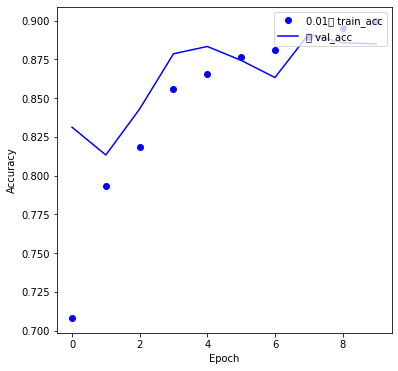

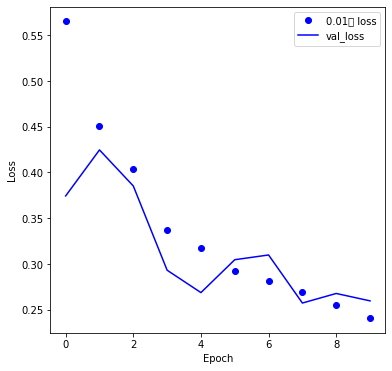







 33%|███▎      | 1/3 [44:46<1:29:32, 2686.37s/it]

Epoch 1/10
266/266 [==============================] - 262s 980ms/step - loss: 0.6077 - accuracy: 0.6576 - val_loss: 0.5562 - val_accuracy: 0.7273
Epoch 2/10
266/266 [==============================] - 259s 973ms/step - loss: 0.4784 - accuracy: 0.7750 - val_loss: 0.2719 - val_accuracy: 0.8970
Epoch 3/10
266/266 [==============================] - 260s 976ms/step - loss: 0.4008 - accuracy: 0.8159 - val_loss: 0.4178 - val_accuracy: 0.8039
Epoch 4/10
266/266 [==============================] - 258s 970ms/step - loss: 0.3726 - accuracy: 0.8370 - val_loss: 0.3828 - val_accuracy: 0.8175
Epoch 5/10
266/266 [==============================] - 262s 983ms/step - loss: 0.3381 - accuracy: 0.8513 - val_loss: 0.2954 - val_accuracy: 0.8692
Epoch 6/10
266/266 [==============================] - 267s 1s/step - loss: 0.3258 - accuracy: 0.8610 - val_loss: 0.2911 - val_accuracy: 0.8727
Epoch 7/10
266/266 [==============================] - 266s 1000ms/step - loss: 0.3099 - accuracy: 0.8664 - val_loss: 0.2457 - v

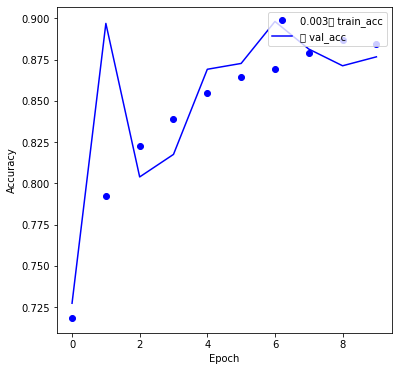

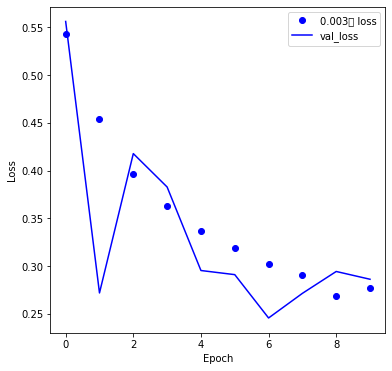







 67%|██████▋   | 2/3 [1:29:54<44:53, 2693.01s/it]

Epoch 1/10
266/266 [==============================] - 283s 1s/step - loss: 0.6343 - accuracy: 0.6280 - val_loss: 0.3750 - val_accuracy: 0.8857
Epoch 2/10
266/266 [==============================] - 276s 1s/step - loss: 0.5020 - accuracy: 0.7615 - val_loss: 0.3313 - val_accuracy: 0.8942
Epoch 3/10
266/266 [==============================] - 268s 1s/step - loss: 0.4578 - accuracy: 0.7849 - val_loss: 0.3182 - val_accuracy: 0.8784
Epoch 4/10
266/266 [==============================] - 267s 1s/step - loss: 0.4267 - accuracy: 0.8046 - val_loss: 0.3137 - val_accuracy: 0.8824
Epoch 5/10
266/266 [==============================] - 268s 1s/step - loss: 0.4119 - accuracy: 0.8136 - val_loss: 0.3008 - val_accuracy: 0.8798
Epoch 6/10
266/266 [==============================] - 268s 1s/step - loss: 0.3919 - accuracy: 0.8258 - val_loss: 0.3201 - val_accuracy: 0.8668
Epoch 7/10
266/266 [==============================] - 266s 1s/step - loss: 0.3794 - accuracy: 0.8314 - val_loss: 0.3115 - val_accuracy: 0.8788

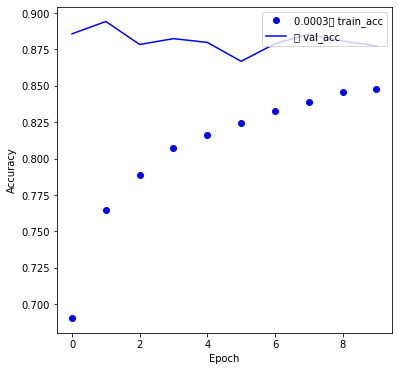

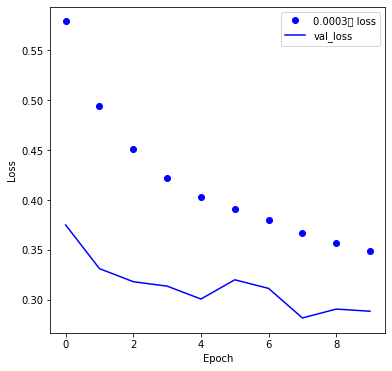







100%|██████████| 3/3 [2:14:55<00:00, 2698.58s/it]


In [ ]:
learning_rates = [0.01,0.003,0.0003]
for rate in tqdm(learning_rates):
  #evaluate model
  history , result = evaluate_lr(rate,train_gen,test_gen)

  #print resut 
  print('learning_rate = %d : test_acc = %3.f' %(rate , result))

  #variables for  learning curve
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(len(acc))

  #plot accuracy learning curve
  plt.figure(figsize= (6,6))
  plt.plot(epochs, acc,'bo', label = str(rate) + '\t train_acc')
  plt.plot(epochs, val_acc, 'b', label = '\t val_acc')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(loc = 'upper right')
  plt.show()

  #plot loss learning curve
  plt.figure(figsize= (6,6))
  plt.plot(epochs, loss,'bo', label = str(rate) + '\t loss')
  plt.plot(epochs, val_loss, 'b' ,label = 'val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(loc = 'upper right')
  plt.show()